In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [0]:
mpl.style.use('ggplot')

In [4]:
print(mpl.__version__)

3.2.1


In [0]:
import pandas as pd
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'

In [0]:
df = pd.read_excel(path, sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [7]:
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [0]:
#preprocess
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace=True)
df.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace=True)
df['Total'] = df.sum(axis = 1)
years = list(map(str, range(1980, 2014)))


In [9]:
df.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [10]:
df_iceland = df.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

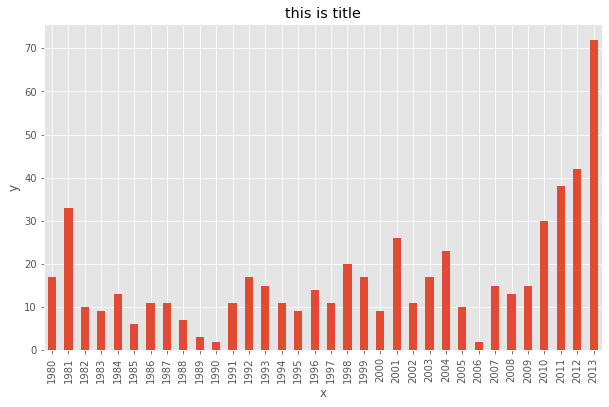

In [11]:
df_iceland.plot(kind = 'bar', figsize = (10, 6))
plt.title('this is title')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

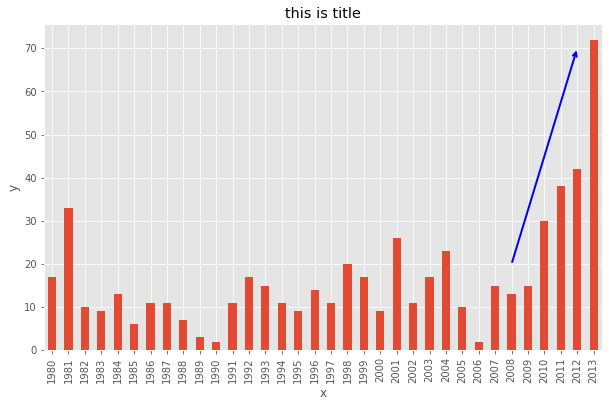

In [13]:
df_iceland.plot(kind = 'bar', figsize = (10, 6), rot = 90)
plt.title('this is title')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('',
             xy = (32, 70),
             xytext = (28, 20),
             xycoords = 'data',
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color = 'blue', lw = 2))
plt.show()

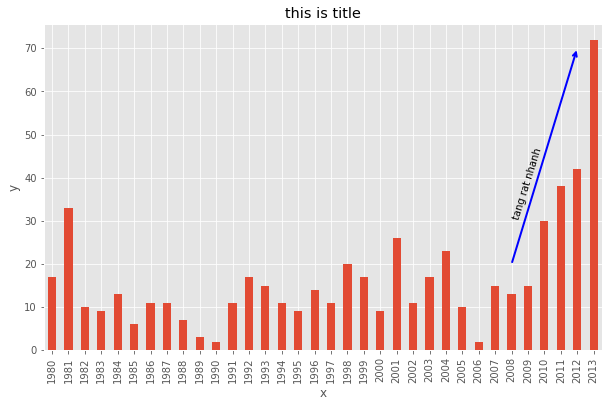

In [15]:
df_iceland.plot(kind = 'bar', figsize = (10, 6), rot = 90)
plt.title('this is title')
plt.ylabel('y')
plt.xlabel('x')
plt.annotate('',
             xy = (32, 70),
             xytext = (28, 20),
             xycoords = 'data',
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color = 'blue', lw = 2))
plt.annotate('tang rat nhanh',
             xy = (28, 30),
             rotation = 72.5,
             va = 'bottom',
             ha = 'left')
plt.show()

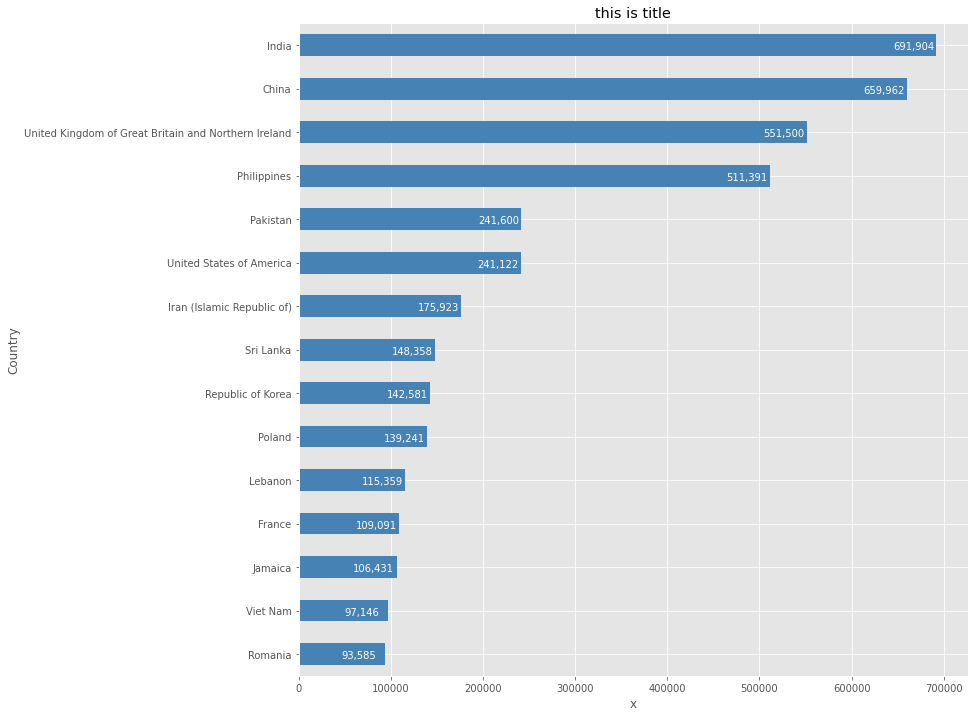

In [16]:
df.sort_values(['Total'], ascending=True, axis = 0, inplace=True)
df_top15 = df['Total'].tail(15)
df_top15.plot(kind = 'barh', figsize = (12, 12), color = 'steelblue')
plt.xlabel('x')
plt.title('this is title')
for index, value in enumerate(df_top15):
  label = format(int(value), ',')
  plt.annotate(label, xy = (value - 47000, index - 0.1), color = 'white')
plt.show()